In [1]:
#Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amrit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amrit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Importing Data

In [3]:
Dataset1 = pd.read_csv(r'facebook_user_data.csv',encoding='latin1')

In [4]:
Dataset1.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [5]:
Dataset1.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [6]:
Dataset1.nunique()

userid                   99003
age                        101
dob_day                     31
dob_year                   101
dob_month                   12
gender                       2
tenure                    2426
friend_count              2562
friendships_initiated     1519
likes                     2924
likes_received            2681
mobile_likes              2396
mobile_likes_received     2004
www_likes                 1726
www_likes_received        1636
dtype: int64

## Exploratory Data Analysis

In [7]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

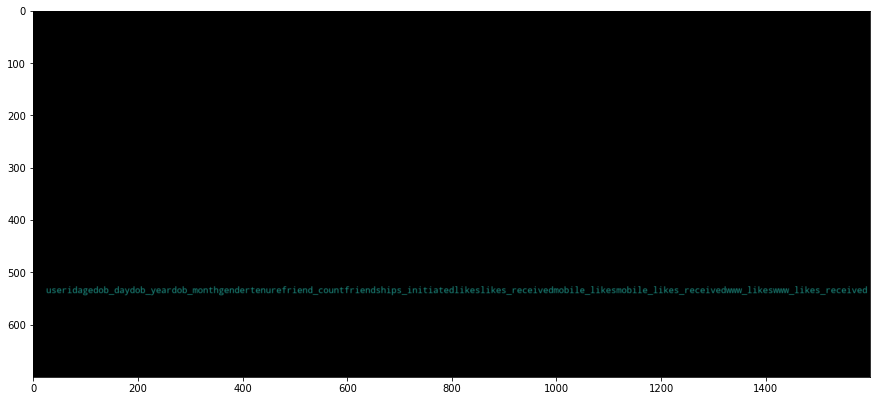

In [8]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1))
plt.imshow(wc, interpolation="bilinear")

AxesSubplot(0.125,0.125;0.62x0.755)


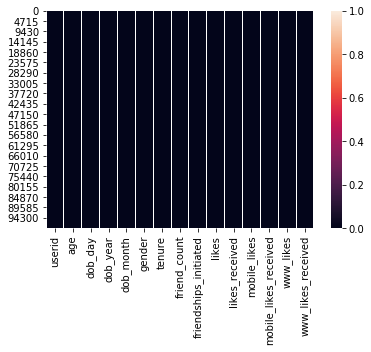

In [9]:
import seaborn as sns
print(sns.heatmap(Dataset1.isnull()))

                         userid       age   dob_day  dob_year  dob_month  \
userid                 1.000000 -0.007265 -0.000839  0.007265   0.002924   
age                   -0.007265  1.000000  0.035035 -1.000000   0.025167   
dob_day               -0.000839  0.035035  1.000000 -0.035035   0.129443   
dob_year               0.007265 -1.000000 -0.035035  1.000000  -0.025167   
dob_month              0.002924  0.025167  0.129443 -0.025167   1.000000   
tenure                -0.003446  0.462742  0.041855 -0.462742   0.029446   
friend_count          -0.001314 -0.027407  0.021961  0.027407   0.019804   
friendships_initiated -0.001591 -0.058059  0.022999  0.058059   0.020075   
likes                 -0.002875 -0.013009  0.015980  0.013009   0.014147   
likes_received         0.001526 -0.022570  0.001367  0.022570   0.006495   
mobile_likes          -0.004868 -0.026715  0.014541  0.026715   0.010400   
mobile_likes_received  0.001753 -0.024248  0.000497  0.024248   0.006435   
www_likes   

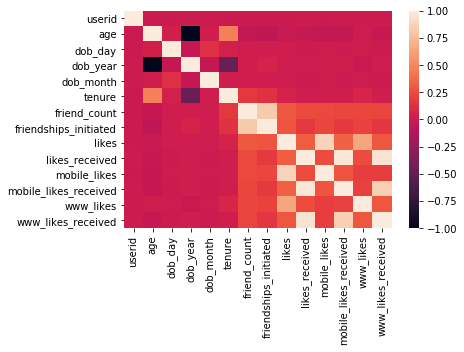

In [10]:
## checking correlation in dataset
print(Dataset1.corr())
print(sns.heatmap(Dataset1.corr()))

In [11]:
# Drops all rows with NaN values
Dataset1.dropna(axis=0,inplace=True , how= 'all')

In [12]:
Dataset1.gender[Dataset1.gender == 'male'] = 1
Dataset1.gender[Dataset1.gender == 'female'] = 2
print(Dataset1)

        userid  age  dob_day  dob_year  dob_month gender  tenure  \
0      2094382   14       19      1999         11      1   266.0   
1      1192601   14        2      1999         11      2     6.0   
2      2083884   14       16      1999         11      1    13.0   
3      1203168   14       25      1999         12      2    93.0   
4      1733186   14        4      1999         12      1    82.0   
...        ...  ...      ...       ...        ...    ...     ...   
98998  1268299   68        4      1945          4      2   541.0   
98999  1256153   18       12      1995          3      2    21.0   
99000  1195943   15       10      1998          5      2   111.0   
99001  1468023   23       11      1990          4      2   416.0   
99002  1397896   39       15      1974          5      2   397.0   

       friend_count  friendships_initiated  likes  likes_received  \
0                 0                      0      0               0   
1                 0                      0   

C:\Users\amrit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\amrit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


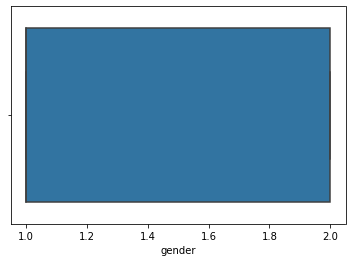

In [13]:
# Box plot
sns.boxplot(Dataset1.gender)

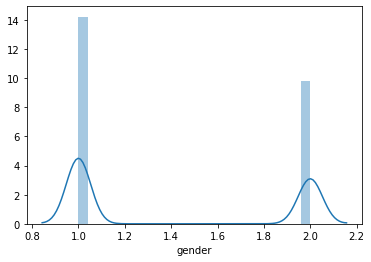

In [14]:
# Distribution plot
sns.distplot(Dataset1.gender)

In [15]:
# Using mode
Dataset1['gender'].fillna(int(Dataset1['gender'].mode()), inplace=True)

In [16]:
Dataset1.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,1,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,2,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,1,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,2,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,1,82.0,0,0,0,0,0,0,0,0


In [17]:
Dataset1.shape

(99003, 15)

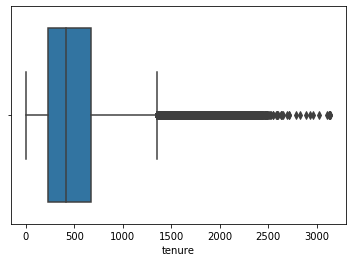

In [18]:
# Box plot
sns.boxplot(Dataset1.tenure)

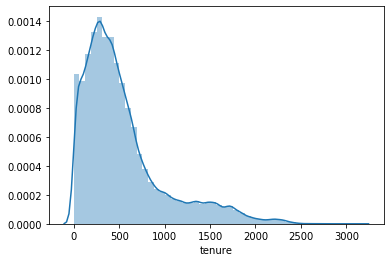

In [19]:
# Distribution plot
sns.distplot(Dataset1.tenure)

In [20]:
# Using median
Dataset1['tenure'].fillna(Dataset1['tenure'].median(), inplace=True)

## Correlation

In [21]:
# checking null values on revised dataset
print(Dataset1.isnull().sum())

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64


AxesSubplot(0.125,0.125;0.62x0.755)


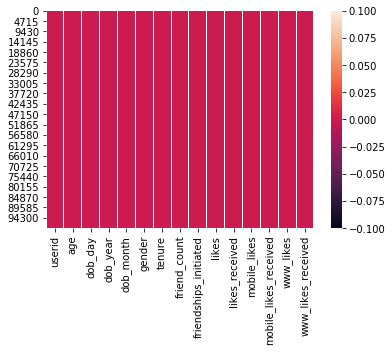

In [22]:
import seaborn as sns
print(sns.heatmap(Dataset1.isnull()))

                         userid       age   dob_day  dob_year  dob_month  \
userid                 1.000000 -0.007265 -0.000839  0.007265   0.002924   
age                   -0.007265  1.000000  0.035035 -1.000000   0.025167   
dob_day               -0.000839  0.035035  1.000000 -0.035035   0.129443   
dob_year               0.007265 -1.000000 -0.035035  1.000000  -0.025167   
dob_month              0.002924  0.025167  0.129443 -0.025167   1.000000   
gender                 0.001670  0.079871  0.046573 -0.079871   0.035756   
tenure                -0.003449  0.462696  0.041859 -0.462696   0.029445   
friend_count          -0.001314 -0.027407  0.021961  0.027407   0.019804   
friendships_initiated -0.001591 -0.058059  0.022999  0.058059   0.020075   
likes                 -0.002875 -0.013009  0.015980  0.013009   0.014147   
likes_received         0.001526 -0.022570  0.001367  0.022570   0.006495   
mobile_likes          -0.004868 -0.026715  0.014541  0.026715   0.010400   
mobile_likes

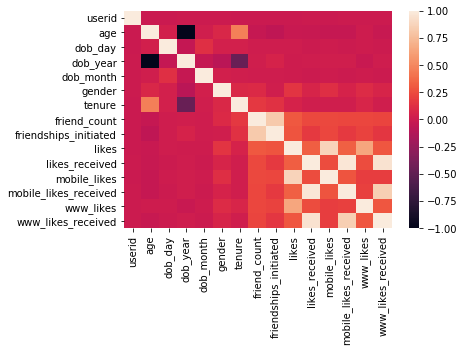

In [23]:
## checking correlation in revised dataset
print(Dataset1.corr())
print(sns.heatmap(Dataset1.corr()))

### Correlation matrix on all the columns.

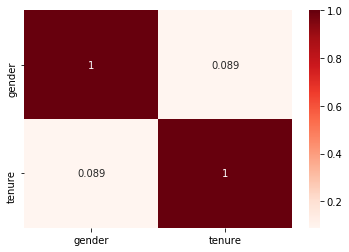

In [41]:
#correlation between gender & tenure
sns.heatmap(Dataset1[['gender','tenure']].corr(), annot=True, cmap = 'Reds')
plt.show()

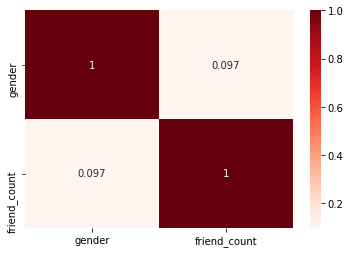

In [42]:
#correlation between gender & friend_count
sns.heatmap(Dataset1[['gender','friend_count']].corr(), annot=True, cmap = 'Reds')
plt.show()

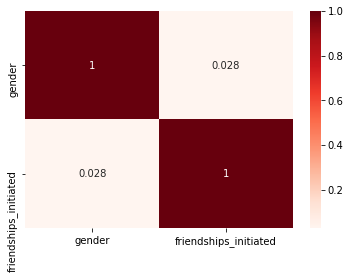

In [43]:
#correlation between gender & friendships_initiated
sns.heatmap(Dataset1[['gender','friendships_initiated']].corr(), annot=True, cmap = 'Reds')
plt.show()

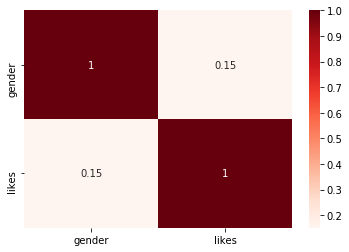

In [44]:
#correlation between gender & likes
sns.heatmap(Dataset1[['gender','likes']].corr(), annot=True, cmap = 'Reds')
plt.show()

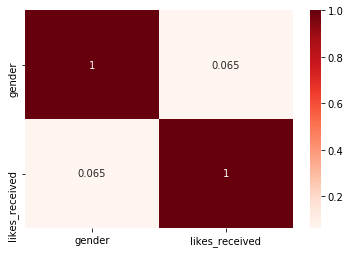

In [45]:
#correlation between gender & likes_received
sns.heatmap(Dataset1[['gender','likes_received']].corr(), annot=True, cmap = 'Reds')
plt.show()

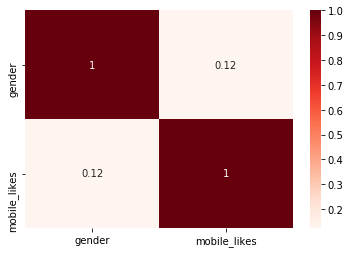

In [46]:
#correlation between gender & mobile_likes
sns.heatmap(Dataset1[['gender','mobile_likes']].corr(), annot=True, cmap = 'Reds')
plt.show()

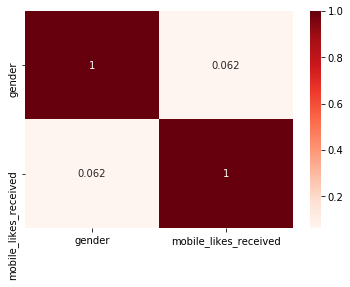

In [47]:
#correlation between gender & mobile_likes_received
sns.heatmap(Dataset1[['gender','mobile_likes_received']].corr(), annot=True, cmap = 'Reds')
plt.show()

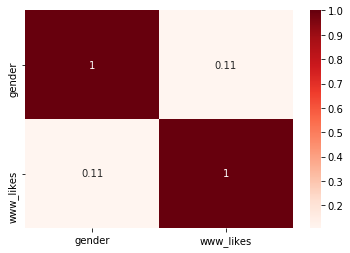

In [48]:
#correlation between gender & www_likes
sns.heatmap(Dataset1[['gender','www_likes']].corr(), annot=True, cmap = 'Reds')
plt.show()

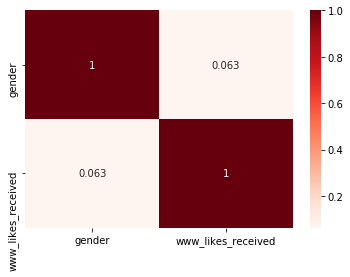

In [49]:
#correlation between gender & www_likes_received
sns.heatmap(Dataset1[['gender','www_likes_received']].corr(), annot=True, cmap = 'Reds')
plt.show()

### Questions

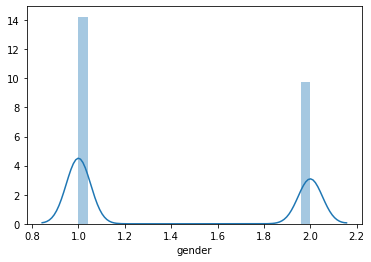

In [24]:
## 3) Analysis based on gender of the users:-
#What is composition of male and female users?
#Distribution plot
sns.distplot(Dataset1.gender)

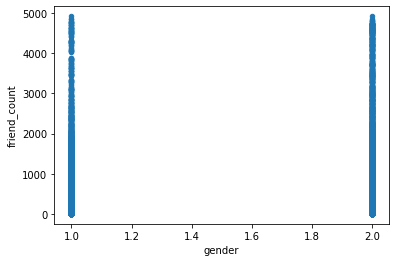

In [25]:
#Which category of gender has more friends?
#plot the scatter plot of balance and age variable in data
Dataset1.plot.scatter(x="gender",y="friend_count")
plt.show()

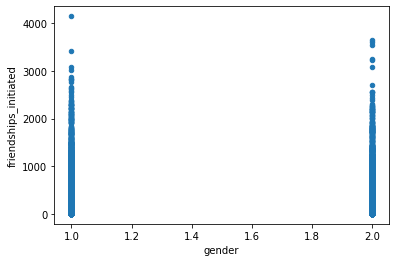

In [26]:
#Which category of gender initiated more friendships?
Dataset1.plot.scatter(x="gender",y="friendships_initiated")
plt.show()

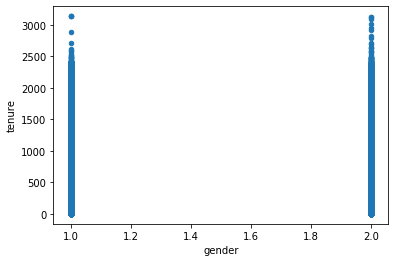

In [27]:
#What is the distribution of tenure across different categories of gender?
Dataset1.plot.scatter(x="gender",y="tenure")
plt.show()

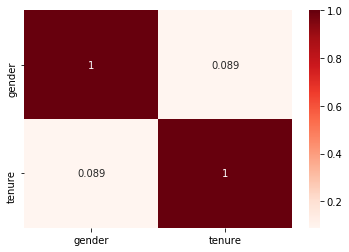

In [28]:
#plot the correlation matrix of tenure and gender in data dataframe.
sns.heatmap(Dataset1[['gender','tenure']].corr(), annot=True, cmap = 'Reds')
plt.show()

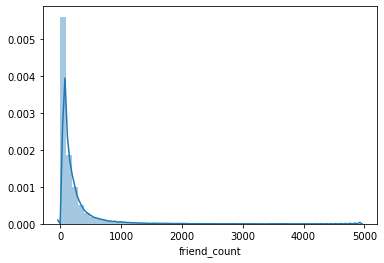

In [29]:
## 4) Analysis based on the least active users on Facebook
#How many users have no friends?
#Distribution plot
sns.distplot(Dataset1.friend_count)

In [30]:
Dataset1.groupby('friend_count')['gender'].mean()

friend_count
0       1.256371
1       1.285793
2       1.304387
3       1.290698
4       1.309746
          ...   
4844    1.000000
4845    1.000000
4863    2.000000
4917    1.000000
4923    2.000000
Name: gender, Length: 2562, dtype: float64

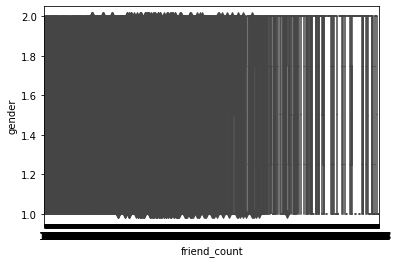

In [31]:
sns.boxplot(Dataset1.friend_count, Dataset1.gender)
plt.show()

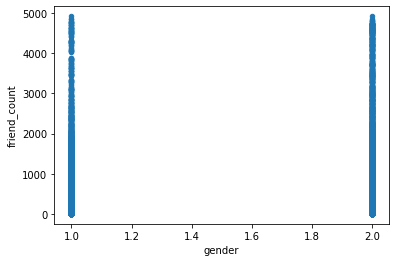

In [32]:
Dataset1.plot.scatter(y="friend_count",x="gender")
plt.show()

In [36]:
#How many users did not like any posts?
(Dataset1['likes'] == 0).sum()

22308

In [37]:
#How many users did not receive any likes?
(Dataset1['likes_received'] == 0).sum()

24428

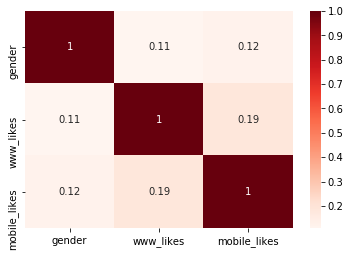

In [39]:
## 5) Analysis based on the user accessibility (Mobile Devices vs. Web Devices)
#What is the average number of posts liked by users (based on gender) through web vs. mobile devices?
#plot the correlation matrix of www_likes , mobile_likes and gender in data dataframe.
sns.heatmap(Dataset1[['gender','www_likes','mobile_likes']].corr(), annot=True, cmap = 'Reds')
plt.show()

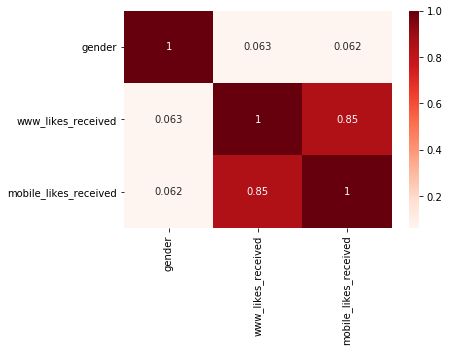

In [40]:
#What is the average number of likes received by users (based on gender) through web vs. mobile devices?
#plot the correlation matrix of www_likes_received , mobile_likes_received and gender in data dataframe.
sns.heatmap(Dataset1[['gender','www_likes_received','mobile_likes_received']].corr(), annot=True, cmap = 'Reds')
plt.show()